# Sorting Algorithms - Binary Search Tree | Individual Assignment
<i>Data Structures & Algorithms | Concepción Díaz Cantarero<br>
Master in Computer Science & Business Technology | 17th December, 2023</i><br><br>

Aida Gomezbueno Berezo | aida.gomezbueno@student.ie.edu

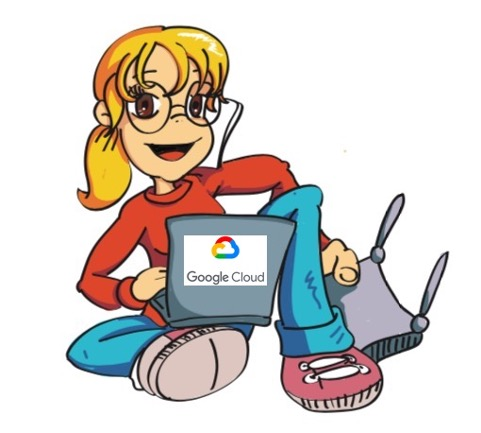

In [1]:
class Node:
    """
    A class representing a node in a binary search tree.

    Attributes:
    data: Holds the value of the node. In a binary search tree, this value is used to
          arrange the nodes in a sorted order.
    parent: A reference to the parent node of the current node. This attribute helps in
            navigating back to the parent node, which is especially useful during node
            deletion and other tree manipulation operations.
    right_node: A reference to the right child of the node. In a binary search tree, the
                right child contains a value greater than the current node's value.
    left_node: A reference to the left child of the node. In a binary search tree, the
               left child contains a value less than the current node's value.

    Methods:
    __init__(self, data, parent): The constructor for Node class. It initializes a new
                                  node with the given data and parent. The right_node and
                                  left_node are initialized as None, indicating that the
                                  new node initially has no children.
    """

    def __init__(self, data, parent):
        """
        Initializes a new instance of the Node class.

        Parameters:
        data: The data value to be stored in the node. This is the key used to arrange
              the nodes in a binary search tree.
        parent: A reference to the parent of this node. For the root node of the tree,
                this parameter is None.
        """
        self.data = data
        self.parent = parent
        self.right_node = None
        self.left_node = None

In [2]:
class BinarySearchTree:

    def __init__(self):

        """
        Initializes an empty binary search tree with a root set to None.
        """
        
        self.root = None

    def remove(self, data):

        """
        Public method to remove a node with the given data from the tree.
        If the tree is not empty, it calls the private remove_node method to
        find and remove the specified node.
        """
        
        if self.root: #not None - tree is not empty
            self.remove_node(data, self.root) # call remove_node to remove the specified data - should traverse tree from root node to find the node with the specified data, then remove it

    def insert(self, data):

        """
        Public method to insert a new node with the given data into the tree.
        If the tree is empty, the new node becomes the root.
        Otherwise, it calls the private insert_node method to place the new node
        in the correct location in the tree.
        """
        
        if self.root is None: # tree is empty
            self.root = Node(data, None) # create root node - parent None as it is the root node
        else:
            self.insert_node(data, self.root) # if tree not empty, insert data attending to order, by traversing the tree in specified order

    def insert_node(self, data, node):

        """
        Private method to insert a new node with the given data into the binary search tree.
        It places the new node in the correct location in the tree based on BST properties.

        The key characteristics of a BST that guide the insertion are:
        1. Each node contains a unique key (data).
        2. The left subtree of a node contains only nodes with keys less than the node's key.
        3. The right subtree of a node contains only nodes with keys greater than the node's key.
        4. Both the left and right subtrees must also be binary search trees.

        The method works as follows:
        - If the data to be inserted is less than the data of the current node, 
          the method is recursively called on the left subtree. 
          If the current node does not have a left child, the new node is inserted there.
        - If the data is greater than or equal to the current node's data, 
          the method is recursively called on the right subtree. 
          If the current node does not have a right child, the new node is inserted there.

        This process ensures that the BST properties are maintained after the insertion.
        """
        
        # we have to go to the left subtree
        if data < node.data:
            if node.left_node: # if left node exists, recursively call insert_node until proper index is found to allocate node + data given
                self.insert_node(data, node.left_node)
            else: #if not, we found the index, so we create the node w specified data
                node.left_node = Node(data, node)
        # we have to visit the right subtree
        else:
            if node.right_node:
                self.insert_node(data, node.right_node)
            else:
                node.right_node = Node(data, node)

    def remove_node(self, data, node):

        """
        Private method to remove a node with the given data.
        It handles different cases of node removal, including leaf nodes,
        nodes with one child, and nodes with two children.
        """
       
        if node is None:
            return
    
        if data < node.data:
            self.remove_node(data, node.left_node)
        elif data > node.data:
            self.remove_node(data, node.right_node)
        else: # 3 dif scenarios when removing 
            # REMOVING LEAF NODE
            if node.left_node is None and node.right_node is None:
                parent = node.parent # store node's parent
                if parent and parent.left_node == node: # as the node to remove had no children, if the node to remove is the left child of his parent, remove the reference to it
                    parent.left_node = None
                if parent and parent.right_node == node: # as the node to remove had no children, if the node to remove is the right child of his parent, remove the reference to it
                    parent.right_node = None
                if node == self.root: # if the node itself was the root, remove the reference
                    self.root = None
                # remove by garbage collector
                del node # once the parent has been notifed, then remove the node itself
            
            # ONE CHILDREN - Node with only a right child
            elif node.left_node is None:
                parent = node.parent
                if parent:
                    if parent.left_node == node:
                        parent.left_node = node.right_node
                    if parent.right_node == node:
                        parent.right_node = node.right_node
                else:
                    self.root = node.right_node
                node.right_node.parent = parent
                del node # remove by garbage collector
            
            # ONE CHILDREN - Node with only a left child
            elif node.right_node is None:
                parent = node.parent # to notify node's parent
                if parent:
                    if parent.left_node == node: # if the node to remove is in the left subtree
                        parent.left_node = node.left_node # assign the only left child of the node to its parent left child
                    if parent.right_node == node: # if the node to remove is in the right subtree
                        parent.right_node = node.left_node # assign the only left child of the node to its parent right child
                else: # if the node to remove is the root node
                    self.root = node.left_node # assign the only left child as the root
                node.left_node.parent = parent # to change the parent's attribute of the new node's parent
                del node # remove by garbage collector
            
            else:
            # TWO CHILDREN
                predecessor = self.get_predecessor(node.left_node) # initialized w left_node as predecessor is the largest item in left subtree and a tree is accesed exlusively by root node of each btree
                temp = predecessor.data # store predecessor's data
                predecessor.data = node.data # update node's data w predecessor's data
                node.data = temp # update node's data w predecessor's data
                self.remove_node(data, predecessor) # once we exchanged both nodes, the one to be removed and the predecessor (large item in left subtree), then we call remove_node function to easily remove it

    def get_predecessor(self, node):

        """
        Private Method to find the predecessor of a given node: the maximum value node in the node's left subtree.
        """
        
        # a node's predecessor is the largest item in its left subtree
        # then this method is called by passing the root of the node's left subtree (as we wanna find node's predecessor)
        if node.right_node:
            return self.get_predecessor(node.right_node)
        return node

    def traverse(self):
        
        """
        Initiates in-order traversal of the binary search tree starting from the root.
        The traversal visits nodes in ascending order for a BST (left child, node itself, right child).
        """
        
        if self.root:  # Checks if the tree is not empty
            self.traverse_in_order(self.root)  # Starts in-order traversal from the root

    def pre_traverse(self):
        
        """
        Initiates pre-order traversal of the binary search tree starting from the root.
        In pre-order traversal, each node is visited before its children (node, left child, right child).
        This could be useful for creating a copy of the tree or to get a prefix expression on an expression tree.
        """
        
        if self.root:  # Checks if the tree is not empty
            self.traverse_pre_order(self.root)  # Starts pre-order traversal from the root

    def post_traverse(self):
        
        """
        Initiates post-order traversal of the binary search tree starting from the root.
        In post-order traversal, each node is visited after its children (left child, right child, node).
        This could be useful for deleting the tree or getting a postfix expression on an expression tree.
        """
        
        if self.root:  # Checks if the tree is not empty
            self.traverse_post_order(self.root)  # Starts post-order traversal from the root

    def traverse_in_order(self, node):
        
        """
        Recursively performs an in-order traversal starting from the given node.
        In-order traversal visits the nodes in the following order: left child, node itself, right child.
        
        This method uses recursion, and the call stack keeps track of the recursive calls.
        
        Args:
        node (Node): The current node being visited.

        The method works as follows:
            1. Recursively traverse the left subtree.
            2. Visit (print) the node.
            3. Recursively traverse the right subtree.

        The call stack remembers the context of each recursive call. When a node is visited,
        its left subtree has already been processed, and after processing the node itself,
        the method proceeds to its right subtree. If a node has no children, it's a leaf node,
        and the recursion unwinds, returning control to the parent node in the call stack.
        """
        
        if node.left_node:
            self.traverse_in_order(node.left_node)  # Recursive call for the left subtree (reaching leftmost node)
        print("\t", node.data)  # Process the current node (printing data)
        if node.right_node:
            self.traverse_in_order(node.right_node)  # Recursive call for the right subtree

    def traverse_pre_order(self, node):
        
        """
        Recursively performs a pre-order traversal starting from the given node.
        In pre-order traversal, the node (root) is visited first, followed by the left and right subtrees.
        
        This method uses recursion, where each node acts as the root for its subtree.

        Args:
        node (Node): The current node being visited.

        The method works as follows:
            1. Visit the node itself (print the node's data).
            2. Recursively traverse the left subtree.
            3. Recursively traverse the right subtree.

        The call stack keeps track of the function calls, allowing the program to 
        return to each node's parent and continue traversal after visiting its children.
        """
        
        if node:
            print("\t", node.data)  # Visit the root node first
            self.traverse_pre_order(node.left_node)  # Then traverse the left subtree
            self.traverse_pre_order(node.right_node)  # Finally, traverse the right subtree

    def traverse_post_order(self, node):
        
        """
        Recursively performs a post-order traversal starting from the given node.
        In post-order traversal, the node (root) is visited after its left and right subtrees.

        Args:
        node (Node): The current node being visited.

        The method works as follows:
            1. Recursively traverse the left subtree.
            2. Recursively traverse the right subtree.
            3. Visit the node itself (print the node's data).

        The traversal ensures that each node is visited in the order: left child, right child, node.
        """
        
        if node:
            self.traverse_post_order(node.left_node)  # First traverse the left subtree
            self.traverse_post_order(node.right_node)  # Then traverse the right subtree
            print("\t", node.data)  # Finally, visit the root node

    def find(self, data):
        """
        Finds and returns the node with the given data.
        If the node does not exist, returns None.
        """
        return self._find_node(self.root, data)

    def _find_node(self, node, data):
        """
        Helper method to recursively find the node with the given data.
        """
        if node is None or node.data == data:
            return node
        elif data < node.data:
            return self._find_node(node.left_node, data)
        else:
            return self._find_node(node.right_node, data)

# Interactive test of BST funcionality

In [3]:
from random import randint

# Creating BST
bst = BinarySearchTree()

print("###################\n\nINTERACTIVE TEST OF BINARY SEARCH TREE FUNCTIONALITY IMPLEMENTATION\n\n###################\n")

try:
    N = int(input('Set the number of nodes with which you want to populate the BST: '))
    if N == "":
        N = 5
except:
    print("\tInvalid input. Setting tree's number of nodes to 5.")
    N = 5

# dict to store values stored in BST, then been able to remind them to user
elements = {
}

#interactive insertion of keys to BST
for x in range(N):
    try:
        elements["n"+str(x+1)] = int(input('\nIntroduce element #' + str(x+1) + ' (press Enter to insert randomly):'))
        #print(elements["n"+str(x+1)])
        bst.insert(elements["n"+str(x+1)])
    except:
        rand = randint(0, 100)
        while rand in elements.values():
            rand = randint(0, 100)
        elements["n"+str(x+1)] = rand
        bst.insert(elements["n"+str(x+1)])
        print("\tInvalid key data introduced. Storing random element: " + str(rand))

while True:
    # menu
    print("\n\n\nWhich functionality would you like to test?\n\t1. In-order BT traversing.\n\t2. Pre-order BT traversing.\n\t3. Post-order BT traversing.\n\t4. Removing element from BT.\n\t5. Finding predecessor from an specific node.\n\t6. Inserting more data.\n\t7. Exit menu.")
    menu = input('\nPlease, select one option: ')
    while menu == "":
        menu = input('\nPlease, select one option: ')
    menu = int(menu)
    if menu == 1:
        print()
        bst.traverse()
    elif menu == 2:
        print()
        bst.pre_traverse()
    elif menu == 3:
        print()
        bst.post_traverse()
    elif menu == 4: # remove data
        data_to_remove = input('\n\n\tFrom the data stored in the BST (' + str(list(elements.values())) + '), select one to remove it:')
        try:
            node_data = int(data_to_remove)
        except:
            node_data = random.choice(list(elements.values()))
            print("\t\tRandomly selecting data: " + str(node_data))
            #node = bst.find(randc)
        #print(node)
        bst.remove(node_data)
        print()
        bst.traverse()
        del elements[list(elements.keys())[list(elements.values()).index(node_data)]]
    elif menu == 5: # find predecessor
        node_data = input('\n\n\tFrom the data stored in the BST (' + str(list(elements.values())) + '), select one to find its predecessor:')
        try:
            node_data = int(node_data)
            node = bst.find(node_data)
        except:
            randc = random.choice(list(elements.values()))
            print("\t\tRandomly selecting one: " + str(randc))
            node = bst.find(randc)
        
        # finding predecessor of the found node
        if node and node.left_node:
            predecessor = bst.get_predecessor(node.left_node)
            if predecessor:
                print("\n\tPredecessor of ", node.data, ": ", predecessor.data)
            else:
                print("\tThe node has no left subtree, thus no predecessor.")
        else:
            print("\tThe node with data", node_data, "has no left subtree, thus no predecessor.")
    elif menu == 6: # inserting new elements
        cap = len(elements.values())
        try:
            new_el = int(input('\n\tIntroduce new element #' + str(cap+1) + ' (press Enter to insert randomly):'))
            while new_el in elements.values():
                new_el = int(input('\n\tData already stored. Introduce new element #' + str(cap+1) + ':'))
            elements["n"+str(cap+1)] = new_el
            #print(elements["n"+str(cap+1)])
            bst.insert(elements["n"+str(cap+1)])
        except:
            rand = randint(0, 100)
            while rand in elements.values():
                rand = randint(0, 100)
            elements["n"+str(cap+1)] = rand
            bst.insert(elements["n"+str(cap+1)])
            print("\t\tInvalid key data introduced. Storing random element: " + str(rand))
        del cap
        print()
        bst.traverse()
    elif menu == 7:
        break
    else:
        print("Functionality not identified.")   

###################

INTERACTIVE TEST OF BINARY SEARCH TREE FUNCTIONALITY IMPLEMENTATION

###################



Set the number of nodes with which you want to populate the BST:  


	Invalid input. Setting tree's number of nodes to 5.



Introduce element #1 (press Enter to insert randomly): 


	Invalid key data introduced. Storing random element: 95



Introduce element #2 (press Enter to insert randomly): 


	Invalid key data introduced. Storing random element: 97



Introduce element #3 (press Enter to insert randomly): 


	Invalid key data introduced. Storing random element: 64



Introduce element #4 (press Enter to insert randomly): 


	Invalid key data introduced. Storing random element: 12



Introduce element #5 (press Enter to insert randomly): 


	Invalid key data introduced. Storing random element: 0



Which functionality would you like to test?
	1. In-order BT traversing.
	2. Pre-order BT traversing.
	3. Post-order BT traversing.
	4. Removing element from BT.
	5. Finding predecessor from an specific node.
	6. Inserting more data.
	7. Exit menu.



Please, select one option:  6

	Introduce new element #6: 


		Invalid key data introduced. Storing random element: 71

	 0
	 12
	 64
	 71
	 95
	 97



Which functionality would you like to test?
	1. In-order BT traversing.
	2. Pre-order BT traversing.
	3. Post-order BT traversing.
	4. Removing element from BT.
	5. Finding predecessor from an specific node.
	6. Inserting more data.
	7. Exit menu.



Please, select one option:  7
